In [1]:
#! pip install plotly-express

In [2]:
# Source of the Raw Data
#https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney



In [3]:
#!pip install plotly


In [4]:
#!pip install seaborn

In [5]:
#!pip install wordcloud

In [6]:
#Import Dependencies

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from wordcloud import WordCloud
from sqlalchemy import create_engine

In [7]:
# Get Data
master_df=pd.read_csv('MoviesOnStreemingPlatformsV2.csv')
master_df2=pd.read_csv('tv_shows.csv')

In [8]:
master_df.head(2)

ID       Title  Year  Age  IMDb Rotten Tomatoes  Netflix  Hulu  \
0   1   Inception  2010  13+   8.8             87%        1     0   
1   2  The Matrix  1999  18+   8.7             87%        1     0   

   Prime Video  Disney+  Type                       Directors  \
0            0        0     0               Christopher Nolan   
1            0        0     0  Lana Wachowski,Lilly Wachowski   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   

                  Language  Runtime  
0  English,Japanese,French    148.0  
1                  English    136.0

In [9]:
master_df2.head(2)

Unnamed: 0            Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0     Breaking Bad  2008  18+   9.5             96%        1   
1           1  Stranger Things  2016  16+   8.8             93%        1   

   Hulu  Prime Video  Disney+  type  
0     0            0        0     1  
1     0            0        0     1

In [10]:
# Shape of the dataframe
master_df.shape

(16518, 16)

In [11]:
# Shape of the dataframe
master_df2.shape

(5599, 11)

In [12]:
# Print the name of the columns
master_df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')

In [13]:
# Check for NULL Values
master_df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9183
IMDb                 410
Rotten Tomatoes    11363
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            500
Genres                49
Country              209
Language             373
Runtime              366
dtype: int64

In [14]:
# Check for NULL Values
master_df2.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2439
IMDb               1155
Rotten Tomatoes    4590
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [15]:
# Check unique values
master_df.nunique()

ID                 16518
Title              16518
Year                 109
Age                    5
IMDb                  82
Rotten Tomatoes       99
Netflix                2
Hulu                   2
Prime Video            2
Disney+                2
Type                   1
Directors          11338
Genres              1909
Country             1303
Language            1102
Runtime              225
dtype: int64

In [16]:
# Check unique values
master_df2.nunique()

Unnamed: 0         5599
Title              5557
Year                 81
Age                   5
IMDb                 78
Rotten Tomatoes      88
Netflix               2
Hulu                  2
Prime Video           2
Disney+               2
type                  1
dtype: int64

In [17]:
# Check for duplicate values
master_df.duplicated().sum()

0

In [18]:
# Check for duplicate values
master_df2.duplicated().sum()

0

In [19]:
# Make a copy for the dataset
master_dup_df = master_df.copy()

In [20]:
# Make a copy for the dataset
master_dup_df2 = master_df2.copy()

In [21]:
master_dup_df.shape

(16518, 16)

In [22]:
master_dup_df2.shape

(5599, 11)

In [23]:
# Drop NULL values in Runtime

master_dup_df=master_dup_df.dropna(subset=['Runtime'])
master_dup_df.shape



(16152, 16)

In [24]:
# Drop NULL values in Language and Country
master_dup_df=master_dup_df.dropna(subset=['Language','Country'])
master_dup_df.shape


(15844, 16)

In [25]:
# Null value validation
master_dup_df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 8663
IMDb                 301
Rotten Tomatoes    10758
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            339
Genres                15
Country                0
Language               0
Runtime                0
dtype: int64

In [26]:
#master_dup_df['Directors'] = master_dup_df['Directors'].fillna("missing")
filtered_df = master_dup_df.copy()


In [27]:
filtered_df.isnull().sum()


ID                     0
Title                  0
Year                   0
Age                 8663
IMDb                 301
Rotten Tomatoes    10758
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            339
Genres                15
Country                0
Language               0
Runtime                0
dtype: int64

In [28]:
# Fill Director NA with "No Director"
filtered_df["Directors"].fillna("No Director", inplace = True)

In [29]:
# No Director validation
No_Director = filtered_df.loc[:, "Directors"]=="No Director"
df_no_director = filtered_df.loc[No_Director]
df_no_director.head()

ID                Title  Year  Age  IMDb Rotten Tomatoes  Netflix  Hulu  \
58    59          Snowpiercer  2013  18+   7.1             94%        1     0   
80    81         Philadelphia  1993  13+   7.7             80%        1     0   
94    95                 Roma  2018  18+   7.7             96%        1     0   
103  104                  Amy  2015  18+   7.8             95%        1     0   
215  216  The Young Offenders  2016  NaN   7.1            100%        1     0   

     Prime Video  Disney+  Type    Directors  \
58             0        0     0  No Director   
80             0        0     0  No Director   
94             0        0     0  No Director   
103            1        1     0  No Director   
215            0        0     0  No Director   

                               Genres                       Country Language  \
58       Action,Drama,Sci-Fi,Thriller                 United States  English   
80                             Comedy                 United States  English   
94   Action,Drama,History,Romance,War  United Kingdom,United States  English   
103                             Drama                 United States  English   
215                            Comedy        United Kingdom,Ireland  English   

     Runtime  
58      60.0  
80      22.0  
94      52.0  
103     60.0  
215     30.0

In [30]:
# Null values validation
filtered_df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 8663
IMDb                 301
Rotten Tomatoes    10758
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors              0
Genres                15
Country                0
Language               0
Runtime                0
dtype: int64

In [31]:
filtered_df.shape

(15844, 16)

In [32]:
# Drop Type Column: No usefull information on the dataframe

filtered_df.drop(['Type'],axis=1, inplace=True)

filtered_df

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0          1                       Inception  2010  13+   8.8             87%   
1          2                      The Matrix  1999  18+   8.7             87%   
2          3          Avengers: Infinity War  2018  13+   8.5             84%   
3          4              Back to the Future  1985   7+   8.5             96%   
4          5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   
...      ...                             ...   ...  ...   ...             ...   
16511  16512                 The Bears and I  1974  all   6.2             NaN   
16512  16513    Whispers: An Elephant's Tale  2000  all   5.0             NaN   
16513  16514       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16514  16515                  The Poof Point  2001   7+   4.7             NaN   
16517  16518                In Beaver Valley  1950  NaN   NaN             NaN   

       Netflix  Hulu  Prime Video  Disney+                       Directors  \
0            1     0            0        0               Christopher Nolan   
1            1     0            0        0  Lana Wachowski,Lilly Wachowski   
2            1     0            0        0         Anthony Russo,Joe Russo   
3            1     0            0        0                 Robert Zemeckis   
4            1     0            1        0                    Sergio Leone   
...        ...   ...          ...      ...                             ...   
16511        0     0            0        1                Bernard McEveety   
16512        0     0            0        1                  Dereck Joubert   
16513        0     0            0        1                    Bruce Bilson   
16514        0     0            0        1                     Neal Israel   
16517        0     0            0        1                     James Algar   

                                 Genres                       Country  \
0      Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                         Action,Sci-Fi                 United States   
2               Action,Adventure,Sci-Fi                 United States   
3               Adventure,Comedy,Sci-Fi                 United States   
4                               Western      Italy,Spain,West Germany   
...                                 ...                           ...   
16511                      Drama,Family                 United States   
16512                  Adventure,Family                 United States   
16513      Comedy,Family,Fantasy,Horror                 United States   
16514              Comedy,Family,Sci-Fi                 United States   
16517          Documentary,Short,Family                 United States   

                      Language  Runtime  
0      English,Japanese,French    148.0  
1                      English    136.0  
2                      English    149.0  
3                      English    116.0  
4                      Italian    161.0  
...                        ...      ...  
16511                  English     89.0  
16512                  English     72.0  
16513                  English    120.0  
16514                  English     90.0  
16517                  English     32.0  

[15844 rows x 15 columns]

In [33]:
# Drop Unnamed Column: No usefull information on the dataframe

#filtered_df.drop(['Unnamed: 0'],axis=1, inplace=True)

#filtered_df

Figure(936x936)


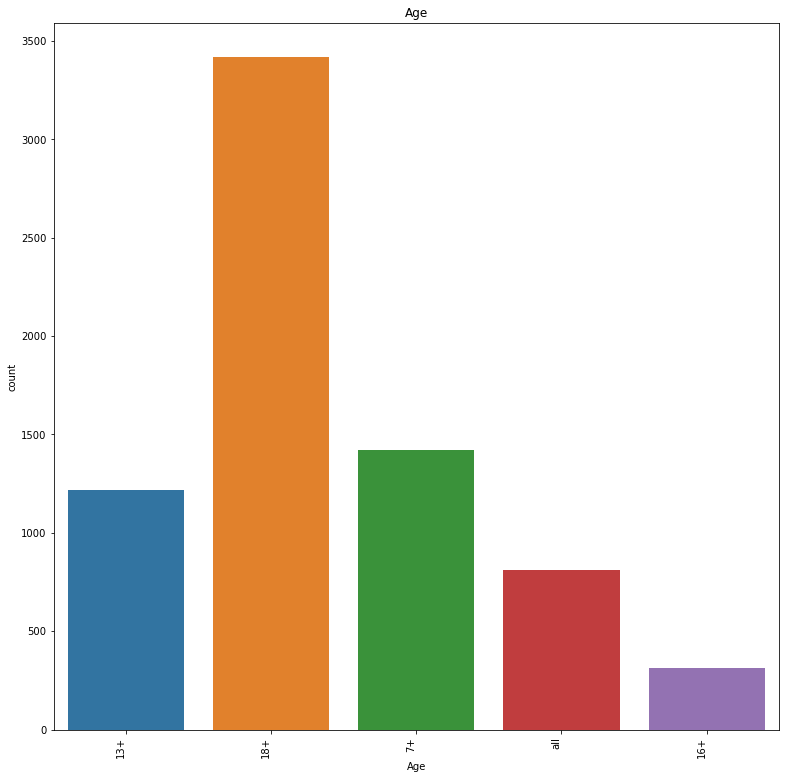

In [34]:
# Movies by Age classification

sns.countplot(filtered_df['Age'])
sns.countplot(filtered_df['Age']).set_xticklabels(sns.countplot(filtered_df['Age']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Age')
print(fig)


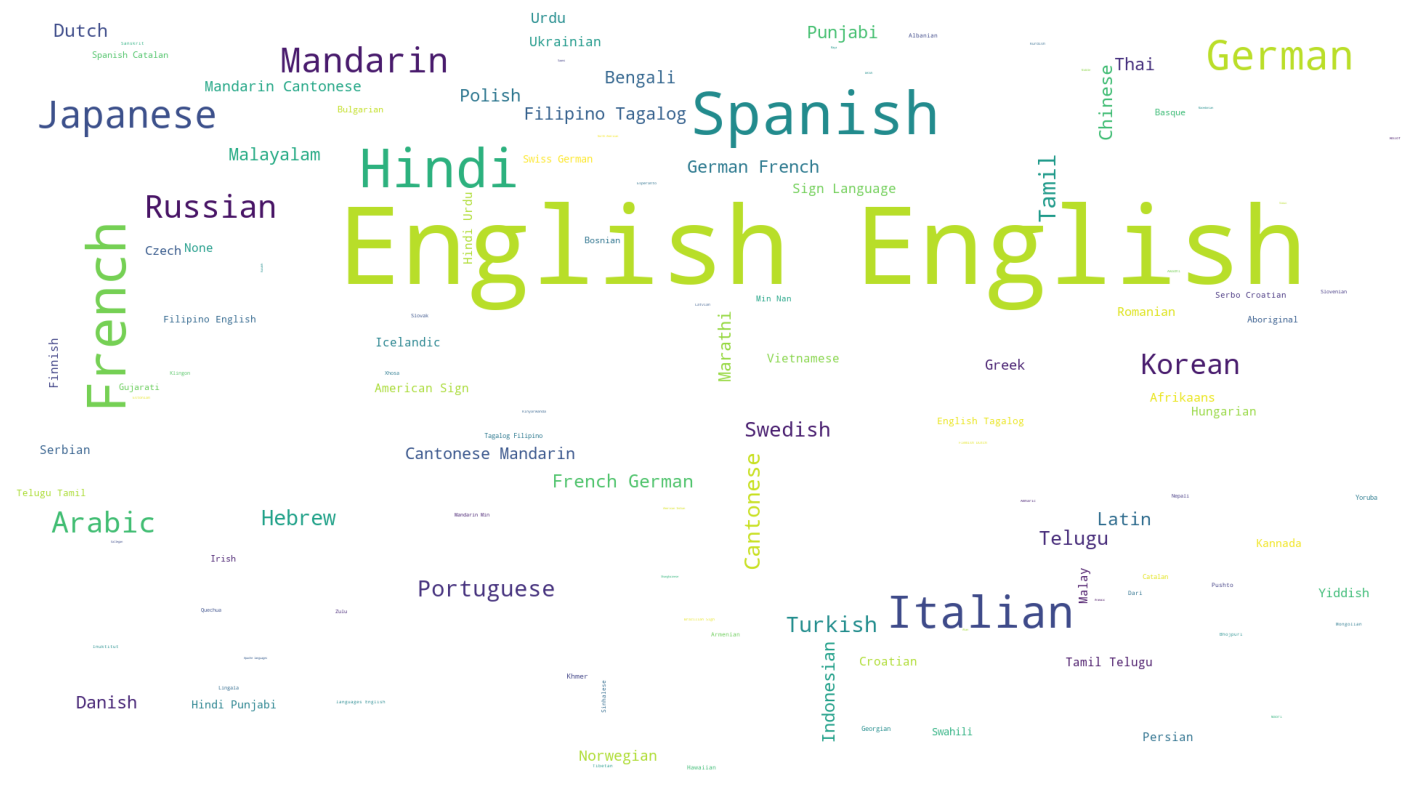

In [35]:
# Movies language Word Cloud

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(filtered_df.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Language.png')
plt.show()





In [37]:
filtered_df[filtered_df.Directors.str.contains('Alfonso')]

ID                                 Title  Year  Age  IMDb  \
76        77                   Y Tu MamÃ¡ TambiÃ©n  2001  18+   7.6   
910      911                   SÃ³lo con tu pareja  1992  NaN   6.9   
2364    2365                      The (Silent) War  2019  18+   5.6   
2885    2886                   Acapulco la vida va  2017  NaN   5.4   
3222    3223           Pocoyo and the Space Circus  2008  all   5.9   
3474    3475     Pocoyo Halloween: Space Halloween  2015  NaN   NaN   
9452    9453                 Picking Up the Pieces  2000  18+   4.8   
10340  10341               Just a Little Chemistry  2015  18+   5.4   
14764  14765  Testa di sbarco per otto implacabili  1968  NaN   5.0   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
76                92%        1     0            0        0   
910               67%        1     0            1        0   
2364              56%        1     0            0        0   
2885              NaN        1     0            0        0   
3222              NaN        1     0            0        0   
3474              NaN        1     0            0        0   
9452              NaN        0     0            1        0   
10340             NaN        0     0            1        0   
14764             NaN        0     0            1        0   

                        Directors                Genres        Country  \
76                Alfonso CuarÃ³n                 Drama         Mexico   
910               Alfonso CuarÃ³n        Comedy,Romance         Mexico   
2364   Alfonso CortÃ©s-Cavanillas          Action,Drama          Spain   
2885     Alfonso Serrano Maturino          Comedy,Drama         Mexico   
3222            Alfonso Rodriguez       Animation,Short          Spain   
3474            Alfonso Rodriguez       Animation,Short  United States   
9452                 Alfonso Arau  Comedy,Crime,Fantasy  United States   
10340            Alfonso Albacete        Comedy,Romance          Spain   
14764             Alfonso Brescia             Drama,War   Italy,France   

                             Language  Runtime  
76                            Spanish    106.0  
910    Spanish,English,Japanese,Latin     94.0  
2364                          Spanish    121.0  
2885                          Spanish     89.0  
3222                  English,Spanish     24.0  
3474                          English     39.0  
9452                          English     95.0  
10340                         Spanish    111.0  
14764   Italian,French,German,English     89.0

In [38]:
# Replace special caracters in Title by vowel


filtered_df['Title'] = filtered_df['Title'].str.replace('\Ã¡', 'á')
filtered_df['Title'] = filtered_df['Title'].str.replace('\Ã©', 'é')
filtered_df['Title'] = filtered_df['Title'].str.replace('\Ã', 'í')
filtered_df['Title'] = filtered_df['Title'].str.replace('\Ã³', 'ó')
filtered_df['Title'] = filtered_df['Title'].str.replace('\íº:', 'ú')
filtered_df['Title'] = filtered_df['Title'].str.replace('\í³', 'ó')

# Replace special caracters in Title

filtered_df['Title'] = filtered_df["Title"].str.replace("\Ä›","ě")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Å™","ř")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¯","ï")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¤","ä")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¥","å")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ãº","ú")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã«","ë")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã§","ç")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã•","Õ")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã´","ō")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã£","ã")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã‰","É")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¨","è")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¦","æ")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¸","ø")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã”","Ô")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã","Á")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã½","ý")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã°","ð")
filtered_df['Title'] = filtered_df["Title"].str.replace("\â€™","'")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¢"," â")
filtered_df['Title'] = filtered_df["Title"].str.replace("\â€¦","")
filtered_df['Title'] = filtered_df["Title"].str.replace("\â…“","1/3")
filtered_df['Title'] = filtered_df["Title"].str.replace("\â€“","-")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¼"," ü")
filtered_df['Title'] = filtered_df["Title"].str.replace("\Ã¶"," oe")


In [39]:
# Replace special caracters in Directors by vowel

filtered_df['Directors'] = filtered_df['Directors'].str.replace('\Ã¡', 'á')
filtered_df['Directors'] = filtered_df['Directors'].str.replace('\Ã©', 'é')
filtered_df['Directors'] = filtered_df['Directors'].str.replace('\Ã', 'í')
filtered_df['Directors'] = filtered_df['Directors'].str.replace('\Ã³', 'ó')
filtered_df['Directors'] = filtered_df['Directors'].str.replace('\íº:', 'ú')
filtered_df['Directors'] = filtered_df['Directors'].str.replace('\í³', 'ó')

# Replace special caracters in Directors

filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ä›","ě")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Å™","ř")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¯","ï")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¤","ä")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¥","å")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ãº","ú")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã«","ë")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã§","ç")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã•","Õ")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã´","ō")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã£","ã")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã‰","É")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¨","è")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¦","æ")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¸","ø")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã”","Ô")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã","Á")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã½","ý")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã°","ð")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\â€™","'")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¢"," â")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\â€¦","")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\â…“","1/3")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\â€“","-")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¼"," ü")
filtered_df['Directors'] = filtered_df["Directors"].str.replace("\Ã¶"," oe")

In [40]:
# Special character change validation

filtered_df[filtered_df.Directors.str.contains('Alfonso')]

ID                                 Title  Year  Age  IMDb  \
76        77                     Y Tu Mamá También  2001  18+   7.6   
910      911                    Sólo con tu pareja  1992  NaN   6.9   
2364    2365                      The (Silent) War  2019  18+   5.6   
2885    2886                   Acapulco la vida va  2017  NaN   5.4   
3222    3223           Pocoyo and the Space Circus  2008  all   5.9   
3474    3475     Pocoyo Halloween: Space Halloween  2015  NaN   NaN   
9452    9453                 Picking Up the Pieces  2000  18+   4.8   
10340  10341               Just a Little Chemistry  2015  18+   5.4   
14764  14765  Testa di sbarco per otto implacabili  1968  NaN   5.0   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
76                92%        1     0            0        0   
910               67%        1     0            1        0   
2364              56%        1     0            0        0   
2885              NaN        1     0            0        0   
3222              NaN        1     0            0        0   
3474              NaN        1     0            0        0   
9452              NaN        0     0            1        0   
10340             NaN        0     0            1        0   
14764             NaN        0     0            1        0   

                       Directors                Genres        Country  \
76                Alfonso Cuarón                 Drama         Mexico   
910               Alfonso Cuarón        Comedy,Romance         Mexico   
2364   Alfonso Cortés-Cavanillas          Action,Drama          Spain   
2885    Alfonso Serrano Maturino          Comedy,Drama         Mexico   
3222           Alfonso Rodriguez       Animation,Short          Spain   
3474           Alfonso Rodriguez       Animation,Short  United States   
9452                Alfonso Arau  Comedy,Crime,Fantasy  United States   
10340           Alfonso Albacete        Comedy,Romance          Spain   
14764            Alfonso Brescia             Drama,War   Italy,France   

                             Language  Runtime  
76                            Spanish    106.0  
910    Spanish,English,Japanese,Latin     94.0  
2364                          Spanish    121.0  
2885                          Spanish     89.0  
3222                  English,Spanish     24.0  
3474                          English     39.0  
9452                          English     95.0  
10340                         Spanish    111.0  
14764   Italian,French,German,English     89.0

In [41]:
# Drop No directors
no_directors_df = filtered_df.loc[filtered_df["Directors"]!= "No Director"]


In [42]:
# No director validation 
no_directors_df_1 = no_directors_df.loc[:, "Directors"]=="No Director"
no_directors_df_1 = no_directors_df.loc[No_Director]
no_directors_df_1.head()

Empty DataFrame
Columns: [ID, Title, Year, Age, IMDb, Rotten Tomatoes, Netflix, Hulu, Prime Video, Disney+, Directors, Genres, Country, Language, Runtime]
Index: []

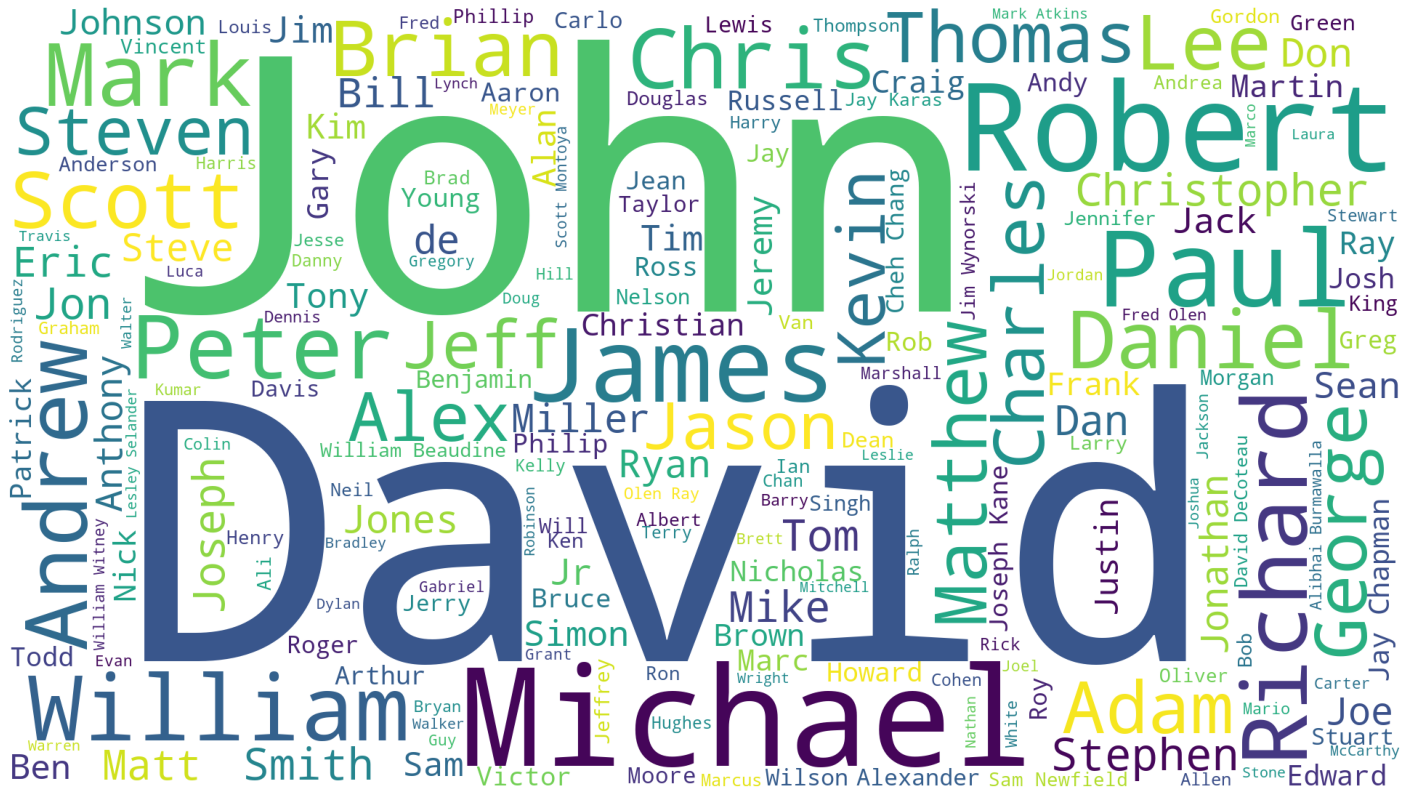

In [43]:
# Word cloud of directors

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(no_directors_df.Directors))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Directors.png')
plt.show()


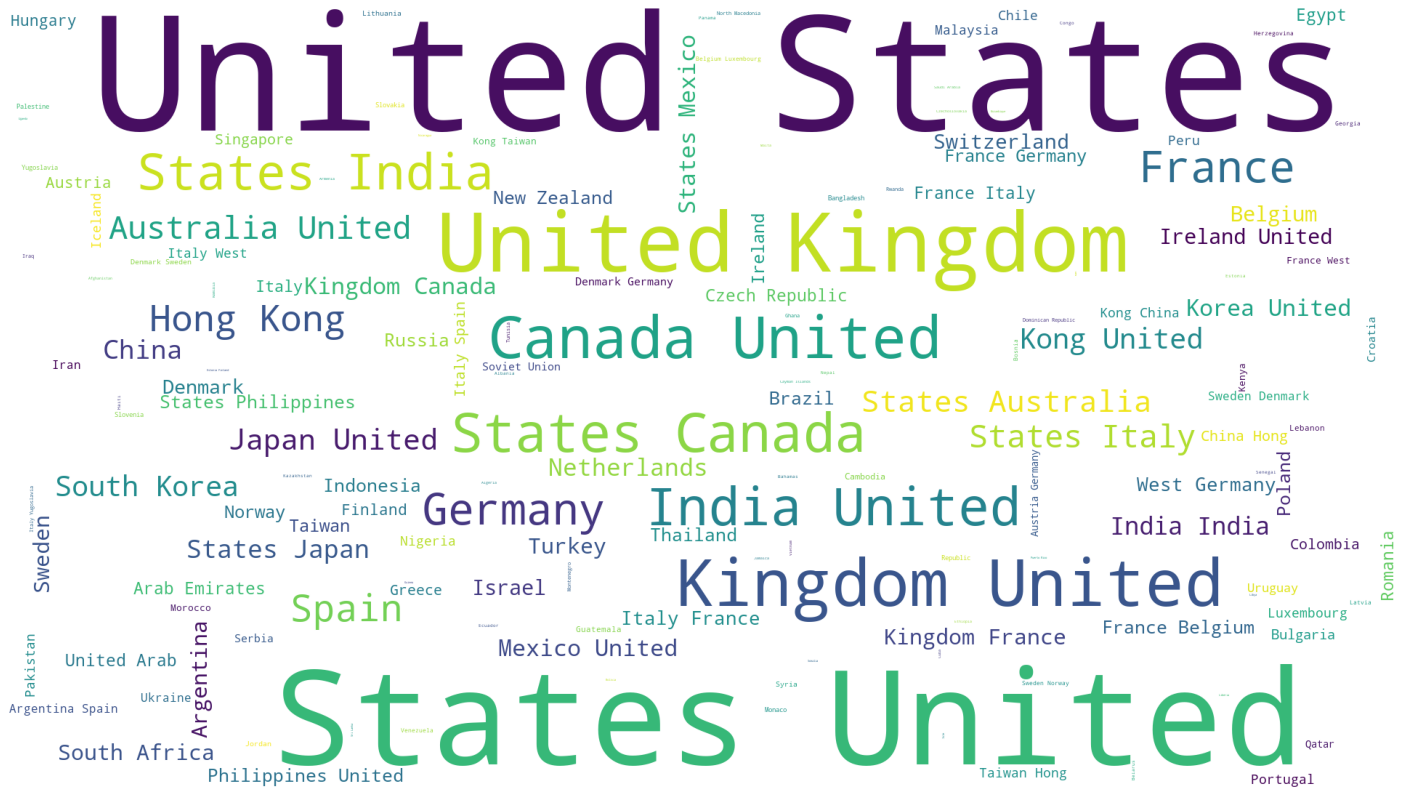

In [44]:
# Word cloud of country

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(filtered_df.Country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Country.png')
plt.show()

Text(0.5, 1.0, 'IMDb')

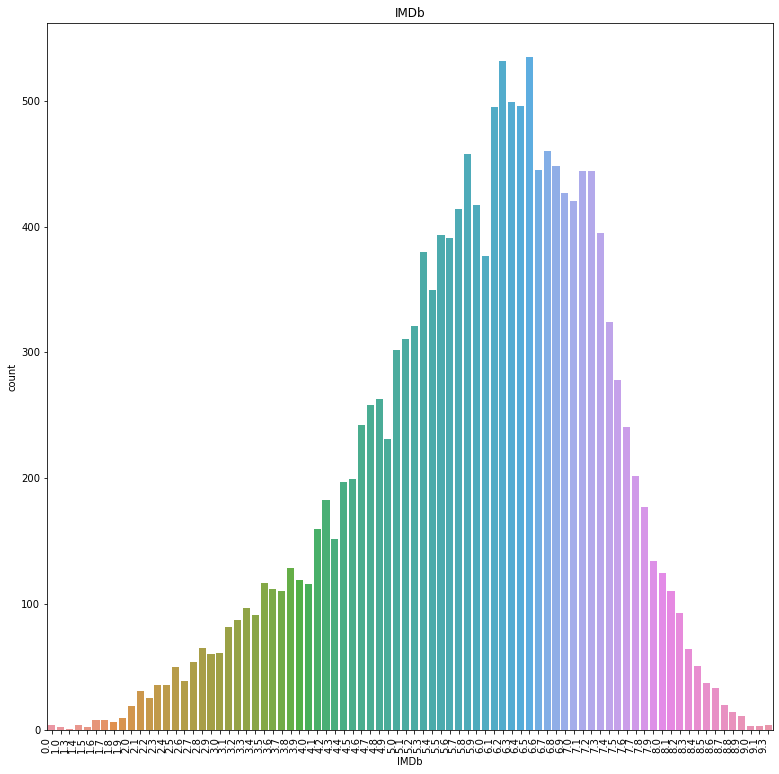

In [45]:
# Histogram of IMDb movie rates distribution

sns.countplot(filtered_df['IMDb'])
sns.countplot(filtered_df['IMDb']).set_xticklabels(sns.countplot(filtered_df['IMDb']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('IMDb')



In [46]:
#Descriptive IMDb statistic data
filtered_df["IMDb"].describe()

count    15543.000000
mean         5.901634
std          1.342984
min          0.000000
25%          5.100000
50%          6.100000
75%          6.900000
max          9.300000
Name: IMDb, dtype: float64

Text(0.5, 1.0, 'Rotten Tomatoes')

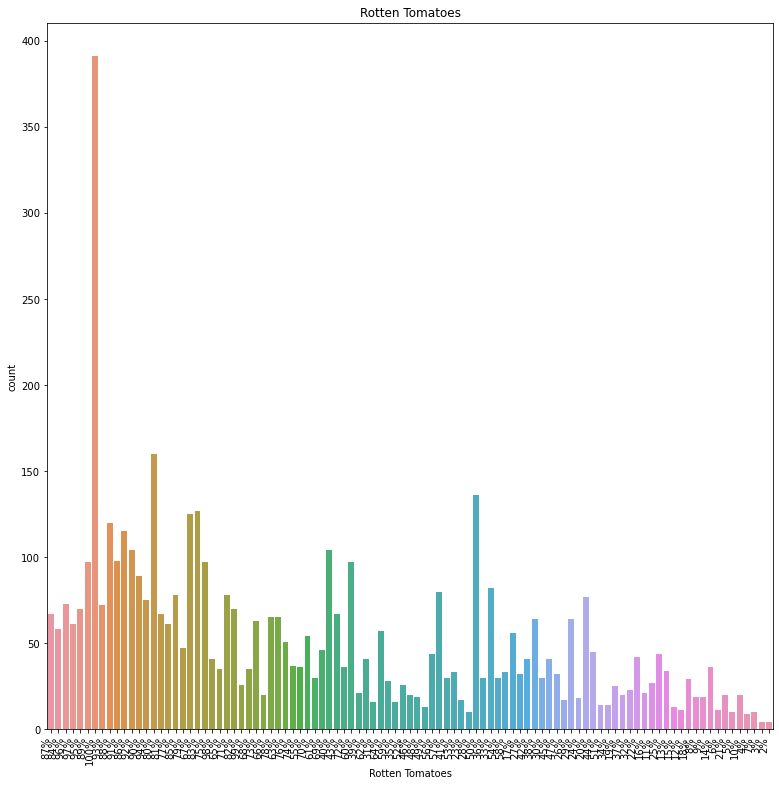

In [47]:
# Histogram of Rotten Tomatoes movie rates distribution: due to the missing data of "Rotten Tomatoes" rating variable, this information will not be used on the formal analysis.    
sns.countplot(filtered_df['Rotten Tomatoes'])
sns.countplot(filtered_df['Rotten Tomatoes']).set_xticklabels(sns.countplot(filtered_df['Rotten Tomatoes']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rotten Tomatoes')


In [48]:
#Missing Rotten Tomatoes data validation
filtered_df["Rotten Tomatoes"].isnull().sum()

10758

In [49]:
#Descriptive Rotten Tomatoes statistic data
filtered_df["Rotten Tomatoes"].describe()

count     5086
unique      99
top       100%
freq       391
Name: Rotten Tomatoes, dtype: object

In [50]:
#Age rating vs Movie year
pd.crosstab(filtered_df.Age,filtered_df.Year)

Year  1902  1912  1915  1920  1922  1925  1930  1931  1932  1933  ...  2011  \
Age                                                               ...         
13+      0     0     0     0     0     1     1     0     0     0  ...    75   
16+      0     0     0     0     0     0     0     0     0     0  ...    16   
18+      0     0     0     0     0     0     0     0     0     1  ...   122   
7+       0     1     1     1     1     0     0     2     1     1  ...    56   
all      1     0     0     0     0     1     1     0     1     1  ...    28   

Year  2012  2013  2014  2015  2016  2017  2018  2019  2020  
Age                                                         
13+     75    79    71    82    91    88    87    41     6  
16+     21    17    30    23    29    63    40    18     3  
18+    145   145   143   188   179   266   249   168    23  
7+      59    74    75    58    86    92    86    49     9  
all     34    34    33    29    32    36    21    13     1  

[5 rows x 97 columns]

In [51]:
#Age rating vs IMDb ratings
pd.crosstab(filtered_df.Age,filtered_df.IMDb)

IMDb  1.0  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  ...  8.2  8.3  8.4  \
Age                                                     ...                  
13+     0    0    0    1    0    1    2    2    3    2  ...   10    2    5   
16+     0    0    0    0    2    0    1    1    0    1  ...    1    1    0   
18+     0    1    0    1    0    0    7   12    6    8  ...   14    8    8   
7+      0    0    0    0    0    0    0    0    2    3  ...    9    5    7   
all     1    0    4    0    0    2    0    0    0    1  ...    7    3    4   

IMDb  8.5  8.6  8.7  8.8  8.9  9.0  9.1  
Age                                      
13+     5    2    2    2    0    1    1  
16+     0    1    0    1    0    0    0  
18+     4    5    3    2    0    0    0  
7+      5    3    2    0    0    0    0  
all     4    1    1    0    2    0    0  

[5 rows x 78 columns]

In [52]:
#IMDb rating vs Rotten Tomatoes grade
pd.crosstab(index=filtered_df['IMDb'],
            columns=filtered_df['Rotten Tomatoes'], margins=True)

Rotten Tomatoes  10%  100%  11%  12%  13%  14%  15%  16%  17%  18%  ...  91%  \
IMDb                                                                ...        
1.6                0     0    0    0    0    0    0    0    0    0  ...    0   
1.8                0     0    0    0    0    0    0    0    0    0  ...    0   
2.0                0     0    0    0    0    0    0    0    0    0  ...    0   
2.4                0     0    0    0    0    0    0    0    0    0  ...    0   
2.5                0     0    1    0    0    0    0    0    0    1  ...    0   
...              ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8.6                0     2    0    0    0    0    0    0    0    0  ...    0   
8.7                0     0    0    0    0    0    0    0    0    0  ...    0   
8.8                0     0    0    0    0    0    0    0    0    0  ...    0   
9.0                0     0    0    0    0    0    0    0    0    0  ...    0   
All               20   391   27   11   34   36   13   21   56   29  ...   98   

Rotten Tomatoes  92%  93%  94%  95%  96%  97%  98%  99%   All  
IMDb                                                           
1.6                0    0    0    0    0    0    0    0     1  
1.8                0    0    0    0    0    0    0    0     1  
2.0                0    0    0    0    0    0    0    0     1  
2.4                0    0    0    0    0    0    0    0     2  
2.5                0    0    0    0    0    0    0    0     3  
...              ...  ...  ...  ...  ...  ...  ...  ...   ...  
8.6                1    0    2    0    0    0    0    1     7  
8.7                0    0    1    0    1    0    0    0     4  
8.8                0    0    0    0    0    1    0    0     2  
9.0                0    0    1    0    0    0    0    0     1  
All              104   72   75   70   73   61   41   26  5084  

[70 rows x 100 columns]

In [53]:
#Validate the data type of the columns
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15844 entries, 0 to 16517
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               15844 non-null  int64  
 1   Title            15844 non-null  object 
 2   Year             15844 non-null  int64  
 3   Age              7181 non-null   object 
 4   IMDb             15543 non-null  float64
 5   Rotten Tomatoes  5086 non-null   object 
 6   Netflix          15844 non-null  int64  
 7   Hulu             15844 non-null  int64  
 8   Prime Video      15844 non-null  int64  
 9   Disney+          15844 non-null  int64  
 10  Directors        15844 non-null  object 
 11  Genres           15829 non-null  object 
 12  Country          15844 non-null  object 
 13  Language         15844 non-null  object 
 14  Runtime          15844 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.6+ MB
None


In [54]:
#Count movies by streaming platform
netflix = filtered_df.Netflix.sum()
hulu = filtered_df.Hulu.sum()
prime=filtered_df['Prime Video'].sum()
disney = filtered_df['Disney+'].sum()
print(netflix,hulu, prime, disney)
streeming = {"Netflix":netflix,"Prime Video":prime,"Hulu":hulu,"Disney":disney}
print (streeming)

3255 874 11781 551
{'Netflix': 3255, 'Prime Video': 11781, 'Hulu': 874, 'Disney': 551}


In [55]:
#Filter age classification by streaming platform
filtered_df.groupby("Age").sum()

ID     Year     IMDb  Netflix  Hulu  Prime Video  Disney+   Runtime
Age                                                                           
13+   7460514  2446230   7409.4      374   114          794       40  125035.0
16+   2296818   630227   1717.9       87    16          222        1   29347.0
18+  24419228  6857327  19179.7      742   288         2569        3  329855.0
7+   11321549  2844325   8605.3      311   109          887      178  139447.0
all   8512637  1614404   4962.6      119    50          390      273   73779.0

In [56]:
#Fill no data on Age column
filtered_df["Age"].fillna("No Data", inplace = True)
filtered_df

ID                           Title  Year      Age  IMDb  \
0          1                       Inception  2010      13+   8.8   
1          2                      The Matrix  1999      18+   8.7   
2          3          Avengers: Infinity War  2018      13+   8.5   
3          4              Back to the Future  1985       7+   8.5   
4          5  The Good, the Bad and the Ugly  1966      18+   8.8   
...      ...                             ...   ...      ...   ...   
16511  16512                 The Bears and I  1974      all   6.2   
16512  16513    Whispers: An Elephant's Tale  2000      all   5.0   
16513  16514       The Ghosts of Buxley Hall  1980  No Data   6.2   
16514  16515                  The Poof Point  2001       7+   4.7   
16517  16518                In Beaver Valley  1950  No Data   NaN   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
0                 87%        1     0            0        0   
1                 87%        1     0            0        0   
2                 84%        1     0            0        0   
3                 96%        1     0            0        0   
4                 97%        1     0            1        0   
...               ...      ...   ...          ...      ...   
16511             NaN        0     0            0        1   
16512             NaN        0     0            0        1   
16513             NaN        0     0            0        1   
16514             NaN        0     0            0        1   
16517             NaN        0     0            0        1   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
16511                Bernard McEveety                      Drama,Family   
16512                  Dereck Joubert                  Adventure,Family   
16513                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
16514                     Neal Israel              Comedy,Family,Sci-Fi   
16517                     James Algar          Documentary,Short,Family   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French    148.0  
1                     United States                  English    136.0  
2                     United States                  English    149.0  
3                     United States                  English    116.0  
4          Italy,Spain,West Germany                  Italian    161.0  
...                             ...                      ...      ...  
16511                 United States                  English     89.0  
16512                 United States                  English     72.0  
16513                 United States                  English    120.0  
16514                 United States                  English     90.0  
16517                 United States                  English     32.0  

[15844 rows x 15 columns]

In [57]:
#Filter age classification by streaming platform with no data on Age column 
filtered_df.groupby("Age").sum()

ID      Year     IMDb  Netflix  Hulu  Prime Video  Disney+  \
Age                                                                         
13+       7460514   2446230   7409.4      374   114          794       40   
16+       2296818    630227   1717.9       87    16          222        1   
18+      24419228   6857327  19179.7      742   288         2569        3   
7+       11321549   2844325   8605.3      311   109          887      178   
No Data  76692107  17336328  49854.2     1622   297         6919       56   
all       8512637   1614404   4962.6      119    50          390      273   

          Runtime  
Age                
13+      125035.0  
16+       29347.0  
18+      329855.0  
7+       139447.0  
No Data  787149.0  
all       73779.0

Text(0.5, 1.0, 'Age')

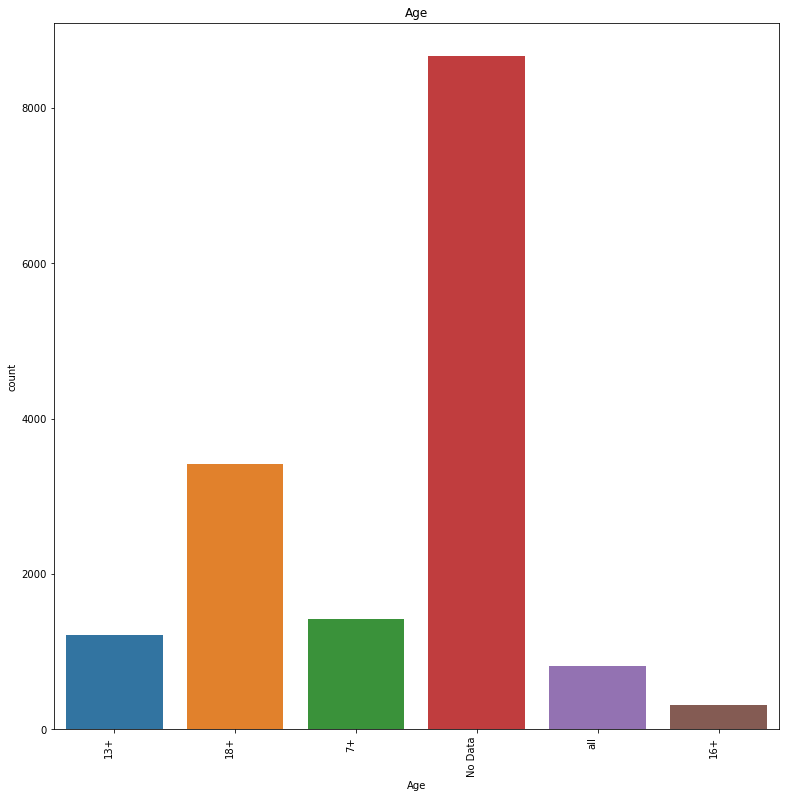

In [58]:
# Movies by Age classification with "No Data" classification
sns.countplot(filtered_df['Age'])
sns.countplot(filtered_df['Age']).set_xticklabels(sns.countplot(filtered_df['Age']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Age')

In [59]:
#Getting exclusive movies by streaming platform
filtered_df["Exclusive"]=""
filtered_df["StreamPL" ]=""
filtered_df.head(5)
#filtered_df.groupby("Age").sum()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+                       Directors  \
0        1     0            0        0               Christopher Nolan   
1        1     0            0        0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0         Anthony Russo,Joe Russo   
3        1     0            0        0                 Robert Zemeckis   
4        1     0            1        0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
3           Adventure,Comedy,Sci-Fi                 United States   
4                           Western      Italy,Spain,West Germany   

                  Language  Runtime Exclusive StreamPL  
0  English,Japanese,French    148.0                     
1                  English    136.0                     
2                  English    149.0                     
3                  English    116.0                     
4                  Italian    161.0

In [60]:
# Drop Type Column: No usefull information on the dataframe

master_df2.drop(['type'],axis=1, inplace=True)

master_df2

Unnamed: 0                            Title  Year  Age  IMDb  \
0              0                     Breaking Bad  2008  18+   9.5   
1              1                  Stranger Things  2016  16+   8.8   
2              2                      Money Heist  2017  18+   8.4   
3              3                         Sherlock  2010  16+   9.1   
4              4                 Better Call Saul  2015  18+   8.7   
...          ...                              ...   ...  ...   ...   
5594        5606  Tut's Treasures: Hidden Secrets  2018  NaN   NaN   
5595        5607                 Paradise Islands  2017  NaN   NaN   
5596        5608                      Wild Russia  2018  NaN   NaN   
5597        5609                      Love & Vets  2017  NaN   NaN   
5598        5610         United States of Animals  2016  NaN   NaN   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  
0                96%        1     0            0        0  
1                93%        1     0            0        0  
2                91%        1     0            0        0  
3                78%        1     0            0        0  
4                97%        1     0            0        0  
...              ...      ...   ...          ...      ...  
5594             NaN        0     0            0        1  
5595             NaN        0     0            0        1  
5596             NaN        0     0            0        1  
5597             NaN        0     0            0        1  
5598             NaN        0     0            0        1  

[5599 rows x 10 columns]

In [130]:
#Getting exclusive series by streaming platform
master_df2["Exclusive"]=""
master_df2["StreamPL" ]=""
master_df2.head(5)

Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+ (Exclusive, StreamPL) Exclusive StreamPL  
0     0            0        0                                           
1     0            0        0                                           
2     0            0        0                                           
3     0            0        0                                           
4     0            0        0

In [131]:
#Iterating through esclusive movies by streaming platform
for i in filtered_df.iterrows():
   filtered_df["Exclusive"]=filtered_df["Netflix" ]+filtered_df["Hulu" ]+filtered_df["Prime Video" ]+filtered_df["Disney+" ]

In [132]:
#Iterating through esclusive series by streaming platform
for i in master_df2.iterrows():
   master_df2["Exclusive"]=master_df2["Netflix" ]+master_df2["Hulu" ]+master_df2["Prime Video" ]+master_df2["Disney+" ]

In [64]:
filtered_df.head(2)

ID       Title  Year  Age  IMDb Rotten Tomatoes  Netflix  Hulu  \
0   1   Inception  2010  13+   8.8             87%        1     0   
1   2  The Matrix  1999  18+   8.7             87%        1     0   

   Prime Video  Disney+                       Directors  \
0            0        0               Christopher Nolan   
1            0        0  Lana Wachowski,Lilly Wachowski   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   

                  Language  Runtime  Exclusive StreamPL  
0  English,Japanese,French    148.0          1           
1                  English    136.0          1

In [133]:
master_df2.head(2)

Unnamed: 0            Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0     Breaking Bad  2008  18+   9.5             96%        1   
1           1  Stranger Things  2016  16+   8.8             93%        1   

   Hulu  Prime Video  Disney+ (Exclusive, StreamPL)  Exclusive StreamPL  
0     0            0        0                                1           
1     0            0        0                                1

In [66]:
#Filtering exclusive movies by 1, this means that the movie is exclusive to an specific platform
Exclusive_df= filtered_df.loc[filtered_df["Exclusive"]== 1]

In [67]:
#Exlusive movies for Netflix platform
Netflix_perc=Exclusive_df.groupby("Netflix")["ID"].count() / streeming["Netflix"]
Netflix_tot=Exclusive_df.groupby("Netflix")["ID"].count()

In [68]:
#Exlusive movies for Prime Video platform
Prime_perc=Exclusive_df.groupby("Prime Video")["ID"].count() / streeming["Prime Video"]
Prime_tot=Exclusive_df.groupby("Prime Video")["ID"].count()

In [69]:
#Exlusive movies for Hulu platform
Hulu_perc=Exclusive_df.groupby("Hulu")["ID"].count() / streeming["Hulu"]
Hulu_tot=Exclusive_df.groupby("Hulu")["ID"].count()

In [70]:
#Exlusive movies for Disney+ platform
Disney_perc=Exclusive_df.groupby("Disney+")["ID"].count() / streeming["Disney"]
Disney_tot=Exclusive_df.groupby("Disney+")["ID"].count()

In [71]:
#Dataframe to calculate exlusive movies percentage by platform
Streem_perc_df= pd.DataFrame({
    "Netflix":Netflix_perc,
    "Prime Video":Prime_perc,
    "Hulu":Hulu_perc,
    "Disney+":Disney_perc
})

In [72]:
#Dataframe to calculate exlusive totals by platform
Streem_tot_df= pd.DataFrame({
    "Netflix":Netflix_tot,
    "Prime Video":Prime_tot,
    "Hulu":Hulu_tot,
    "Disney+":Disney_tot
})

In [73]:
len(Exclusive_df)

15237

In [74]:
#getting exclusivity % for all platforms
totalexclusivity = len(Exclusive_df) / len(filtered_df)
totalexclusivity

0.9616889674324666

In [75]:
Streem_perc_df.head()

Netflix  Prime Video       Hulu    Disney+
0  3.790783     0.342331  16.728833  26.711434
1  0.890323     0.951023   0.704805   0.941924

In [76]:
# Rename created percentage column to "Percs" & "Total"
Streem_fin_df= pd.DataFrame(Streem_perc_df.T.iloc[:,1]).rename(columns={1:"Percs"})
Streem_fin_dftot= pd.DataFrame(Streem_tot_df.T.iloc[:,1]).rename(columns={1:"Total"})

In [77]:
 Streem_fin_df

Percs
Netflix      0.890323
Prime Video  0.951023
Hulu         0.704805
Disney+      0.941924

In [78]:
Streem_fin_dftot

Total
Netflix       2898
Prime Video  11204
Hulu           616
Disney+        519

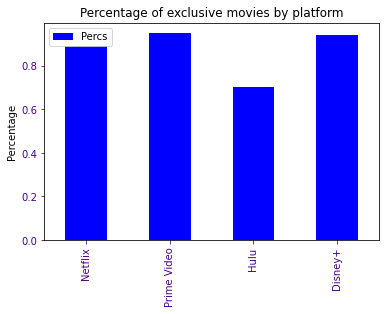

In [79]:
#Creating plot by exlusive movies in platform
ax = Streem_fin_df.plot(kind="bar", stacked = True, color={'blue'})
ax = plt.gca()
ax.tick_params(axis='x', colors='indigo')
ax.tick_params(axis='y', colors='indigo')
plt.ylabel("Percentage")
plt.title("Percentage of exclusive movies by platform")
plt.show()

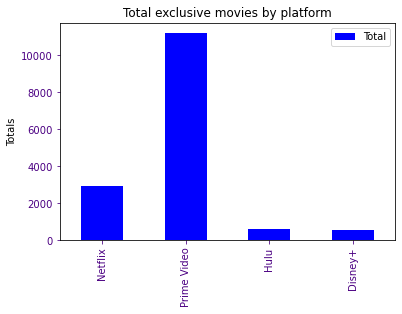

In [80]:
#Creating plot by exlusive movies in platform (total)
ax = Streem_fin_dftot.plot(kind="bar", stacked = True, color={'blue'})
ax = plt.gca()
ax.tick_params(axis='x', colors='indigo')
ax.tick_params(axis='y', colors='indigo')
plt.ylabel("Totals")
plt.title("Total exclusive movies by platform")
plt.show()

In [81]:
#Netflix IMDb grade mean
Netflix_mean=filtered_df.groupby("Netflix")["IMDb"].mean()
Netflix_mean

Netflix
0    5.804842
1    6.272931
Name: IMDb, dtype: float64

In [82]:
#Prime Video IMDb grade mean
Prime_mean=filtered_df.groupby("Prime Video")["IMDb"].mean()
Prime_mean

Prime Video
0    6.286458
1    5.767517
Name: IMDb, dtype: float64

In [83]:
#Hulu IMDb grade mean
Hulu_mean=filtered_df.groupby("Hulu")["IMDb"].mean()
Hulu_mean

Hulu
0    5.887795
1    6.135328
Name: IMDb, dtype: float64

In [84]:
#Disney+ IMDb grade mean
Disney_mean=filtered_df.groupby("Disney+")["IMDb"].mean()
Disney_mean

Disney+
0    5.881938
1    6.438545
Name: IMDb, dtype: float64

In [85]:
# Dataframe with streaming services mean
Streem_mean_df= pd.DataFrame({
    "Netflix":Netflix_mean,
    "Prime Video":Prime_mean,
    "Hulu":Hulu_mean,
    "Disney+":Disney_mean
})

In [86]:
#Rename mean column
Streem_mean_fin_df= pd.DataFrame(Streem_mean_df.T.iloc[:,1]).rename(columns={1:"Mean"})

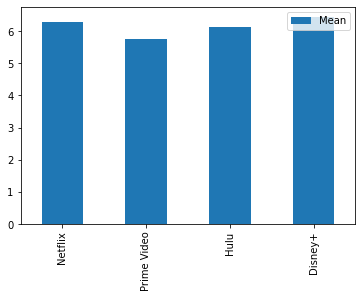

In [87]:
#Ploting mean movies by IMDb rating
Streem_mean_fin_df.plot(kind="bar")
plt.show()

In [88]:
#Netflix IMDb exlusive movies grade mean
Netflix_mean2=Exclusive_df.groupby("Netflix")["IMDb"].mean()
Netflix_mean2

Netflix
0    5.798651
1    6.287679
Name: IMDb, dtype: float64

In [89]:
#Prime video IMDb exlusive movies grade mean
Prime_mean2=Exclusive_df.groupby("Prime Video")["IMDb"].mean()
Prime_mean2

Prime Video
0    6.285277
1    5.749059
Name: IMDb, dtype: float64

In [90]:
#Hulu IMDb exlusive movies grade mean
Hulu_mean2=Exclusive_df.groupby("Hulu")["IMDb"].mean()
Hulu_mean2

Hulu
0    5.881110
1    6.151471
Name: IMDb, dtype: float64

In [91]:
#Disney+ IMDb exlusive movies grade mean
Disney_mean2=Exclusive_df.groupby("Disney+")["IMDb"].mean()
Disney_mean2

Disney+
0    5.872862
1    6.430116
Name: IMDb, dtype: float64

In [92]:
# Dataframe with streaming services mean by exclusive movies
Streem_mean2_df= pd.DataFrame({
    "Netflix":Netflix_mean2,
    "Prime Video":Prime_mean2,
    "Hulu":Hulu_mean2,
    "Disney+":Disney_mean2
})

In [93]:
#Rename mean column
Streem_mean_fin2_df= pd.DataFrame(Streem_mean2_df.T.iloc[:,1]).rename(columns={1:"Mean"})
Streem_mean_fin2_df

Mean
Netflix      6.287679
Prime Video  5.749059
Hulu         6.151471
Disney+      6.430116

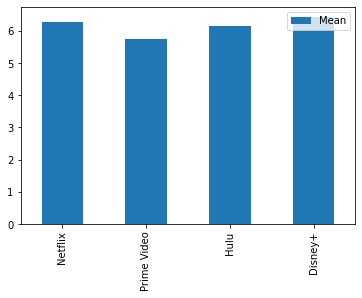

In [94]:
#Ploting the mean on exclusive movies by IMDb rating
Streem_mean_fin2_df.plot(kind="bar")
plt.show()

In [95]:
#Dataframe for exlusive movies by platform
boxdata = Exclusive_df[["IMDb","Netflix","Hulu","Prime Video","Disney+"]]
boxdata.head()

IMDb  Netflix  Hulu  Prime Video  Disney+
0   8.8        1     0            0        0
1   8.7        1     0            0        0
2   8.5        1     0            0        0
3   8.5        1     0            0        0
5   8.4        1     0            0        0

In [96]:
#Generating box data by platform, this only includes exclusive movies
boxdata_N = boxdata.query("Netflix==1").assign(Plat = "Netflix")[["IMDb","Plat"]]
boxdata_P = boxdata.query("`Prime Video`==1").assign(Plat = "Prime Video")[["IMDb","Plat"]]
boxdata_H = boxdata.query("Hulu==1").assign(Plat = "Hulu")[["IMDb","Plat"]]
boxdata_D = boxdata.query("`Disney+`==1").assign(Plat = "Disney")[["IMDb","Plat"]]

In [97]:
#Consolidationg final exclusive movies data
boxdata_Final = (
    boxdata_N
    .append(boxdata_P)
    .append(boxdata_H)
    .append(boxdata_D)
)

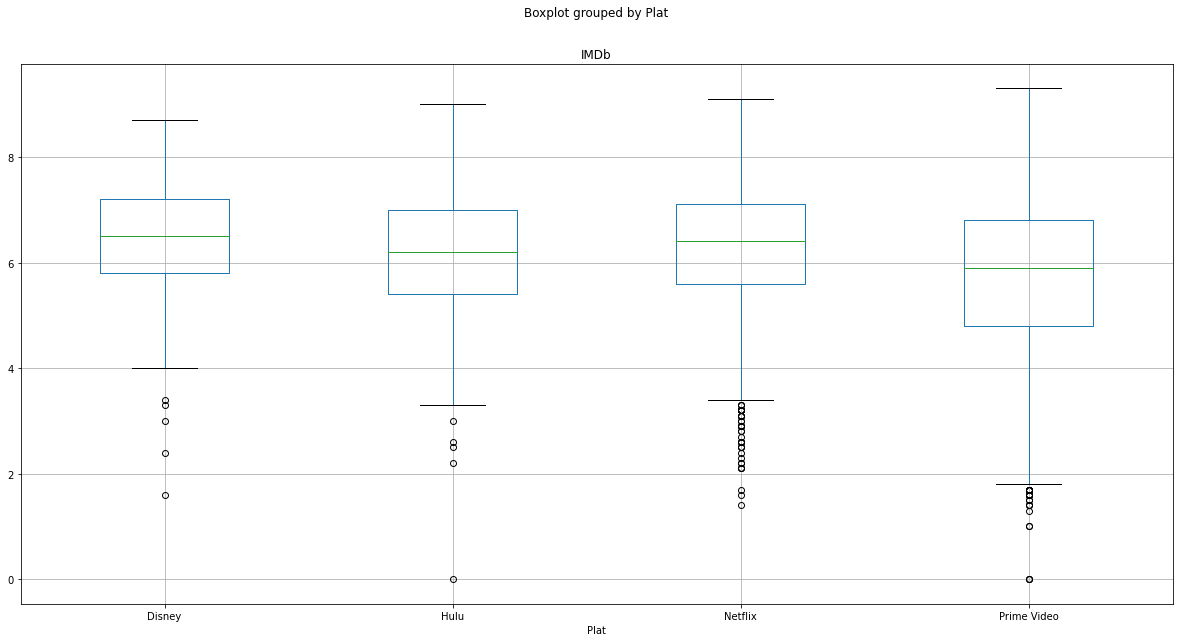

In [98]:
#Ploting box plot for exclusive movies by platform
boxdata_Final.boxplot(column="IMDb", by="Plat", figsize=(20,10))
plt.show()

In [99]:
#Drop Na values 
boxdata_N = boxdata_N.dropna()
boxdata_P = boxdata_P.dropna()
boxdata_H = boxdata_H.dropna()
boxdata_D = boxdata_D.dropna()

In [100]:
#Drop Plat column
boxdata_N.drop(['Plat'],axis=1, inplace=True)
boxdata_P.drop(['Plat'],axis=1, inplace=True)
boxdata_H.drop(['Plat'],axis=1, inplace=True)
boxdata_D.drop(['Plat'],axis=1, inplace=True)

In [101]:
#ANOVA
stats.f_oneway(boxdata_N["IMDb"],boxdata_P["IMDb"], boxdata_H["IMDb"], boxdata_D["IMDb"])

F_onewayResult(statistic=163.14446574018143, pvalue=4.635522043363746e-104)

In [102]:
#Filtering dataframe by languages excluding english 
No_English_df= filtered_df[~filtered_df.Language.str.contains("English",na = False)]

In [103]:
#Show df
No_English_df

ID                           Title  Year      Age  IMDb  \
4          5  The Good, the Bad and the Ugly  1966      18+   8.8   
12        13                 Pan's Labyrinth  2006      18+   8.2   
32        33                  Train to Busan  2016  No Data   7.5   
34        35                          Dangal  2016       7+   8.4   
43        44                          Ip Man  2008      18+   8.0   
...      ...                             ...   ...      ...   ...   
15969  15970               Seeing The Unseen  2018  No Data   NaN   
16047  16048                       Pinocchio  1940      all   7.4   
16230  16231                        Luxo Jr.  1986      all   7.3   
16395  16396                    The Other Me  2000      all   6.1   
16476  16477              Trail of the Panda  2009      all   6.5   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  \
4                 97%        1     0            1        0   
12                95%        1     0            0        0   
32                94%        1     0            1        0   
34                88%        1     0            0        0   
43                85%        1     0            0        0   
...               ...      ...   ...          ...      ...   
15969             NaN        0     0            1        0   
16047            100%        0     0            0        1   
16230             NaN        0     0            0        1   
16395             NaN        0     0            0        1   
16476             NaN        0     0            0        1   

                                            Directors  \
4                                        Sergio Leone   
12                                 Guillermo del Toro   
32                                       Sang-ho Yeon   
34                                      Nitesh Tiwari   
43                                         Wilson Yip   
...                                               ...   
15969  Kristján Kristjánsson,Bjarney Líºí°ví­ksdóttir   
16047                                  Matteo Garrone   
16230                                   John Lasseter   
16395                              Sotiris Tsafoulias   
16476                                        Zhong Yu   

                                         Genres                      Country  \
4                                       Western     Italy,Spain,West Germany   
12                            Drama,Fantasy,War                 Mexico,Spain   
32                       Action,Horror,Thriller                  South Korea   
34                 Action,Biography,Drama,Sport                        India   
43     Action,Adventure,Biography,Drama,History              Hong Kong,China   
...                                         ...                          ...   
15969                               Documentary                      Iceland   
16047                             Drama,Fantasy  Italy,France,United Kingdom   
16230                    Animation,Short,Family                United States   
16395              Crime,Drama,Mystery,Thriller                       Greece   
16476                          Adventure,Family                        China   

                          Language  Runtime  Exclusive StreamPL  
4                          Italian    161.0          2           
12                         Spanish    118.0          1           
32                 Korean,Hawaiian    118.0          2           
34                           Hindi    161.0          1           
43     Cantonese,Mandarin,Japanese    106.0          1           
...                            ...      ...        ...      ...  
15969                    Icelandic     82.0          1           
16047                      Italian    120.0          1           
16230                         None      2.0          1           
16395                 Greek,French    101.0          1           
16476                     Mandarin     87.0          1          

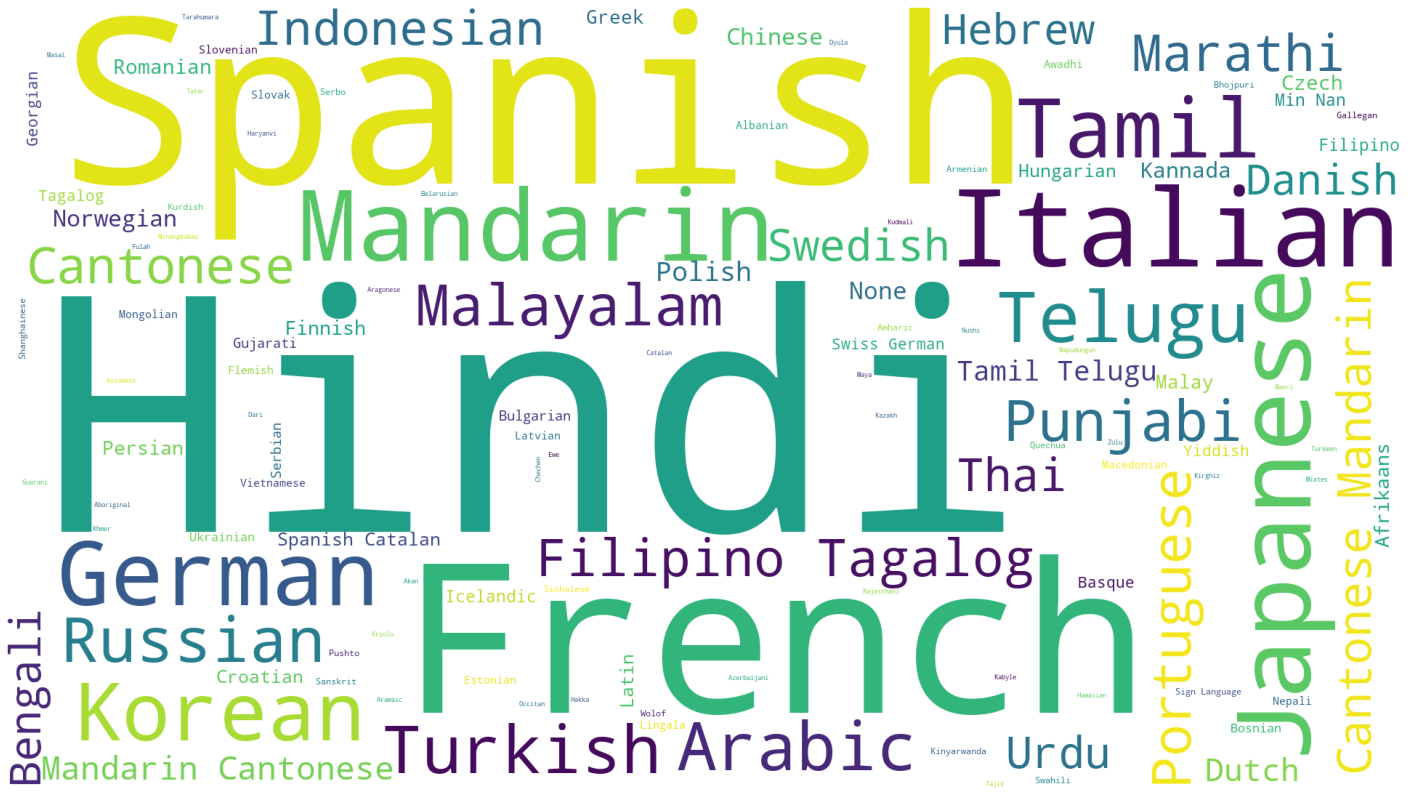

In [104]:
# Language Word Cloud (excluding english)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(No_English_df.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Language_No_English.png')
plt.show()

In [105]:
# Percent of NULL columns
total = filtered_df.isnull().sum().sort_values(ascending=False)
percent = (filtered_df.isnull().sum()/filtered_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
Rotten Tomatoes  10758  0.678995
IMDb               301  0.018998
Genres              15  0.000947
StreamPL             0  0.000000
Hulu                 0  0.000000
Title                0  0.000000
Year                 0  0.000000
Age                  0  0.000000
Netflix              0  0.000000
Prime Video          0  0.000000

In [106]:
#Count of exclusive movies by platform
netflix_movies_count = len(filtered_df[filtered_df['Netflix'] == 1].index)
hulu_movies_count = len(filtered_df[filtered_df['Hulu'] == 1].index)
prime_movies_count =len(filtered_df[filtered_df['Prime Video'] == 1].index)
disney_movies_count = len(filtered_df[filtered_df['Disney+'] == 1].index)


In [107]:
#Dataframe on count of exclusive movies by platform 
label=['Netflix','Hulu', 'Prime Video','Disney+']
count=[netflix_movies_count,hulu_movies_count,prime_movies_count,disney_movies_count]
platform = pd.DataFrame(
    {'Platform': label,
     'MovieCount': count,
    })
platform

Platform  MovieCount
0      Netflix        3255
1         Hulu         874
2  Prime Video       11781
3      Disney+         551

In [108]:
# Distribution by Platform
fig = px.pie(platform,names='Platform', values='MovieCount')
fig.update_traces(rotation=45, pull=[0.1,0.03,0.03,0.03,0.03],textinfo="percent+label", title='Movie Count per platform')
fig.show()

In [109]:
# Count of movies by Year

yearly_movie_count = filtered_df.groupby('Year')['Title'].count().reset_index().rename(columns = {'Title':'MovieCount'})
fig = px.bar(yearly_movie_count, x='Year', y='MovieCount', color='MovieCount', height=600)
fig.show()



In [110]:
# Top 5 Genres with Average Ratings
top_5_genres = ['Drama','Documentary','Comedy', 'Comedy,Drama','Horror']
table = filtered_df.loc[:,['Year','Genres','IMDb']]
table['AvgRating'] = table.groupby([table.Genres,table.Year])['IMDb'].transform('mean')
table.drop('IMDb', axis=1, inplace=True)
table = table[(table.Year>2009) & (table.Year<2020)]
table = table.loc[table['Genres'].isin(top_5_genres)]
table = table.sort_values('Year')

In [111]:
#Plot of Top 5 Genres with Average Ratings
fig=px.bar(table,x='Genres', y='AvgRating', animation_frame='Year', 
           animation_group='Genres', color='Genres', hover_name='Genres', range_y=[0,10])
fig.update_layout(showlegend=False)
fig.show()

In [112]:
# Movies greater than 9 in IMDb... Top 10
top_movies=filtered_df[filtered_df['IMDb']>= 9.0][['Title','Directors']]
top_movies

Title                Directors
945                                 Natsamrat         Mahesh Manjrekar
3475                          The Dark Knight        Christopher Nolan
6476                               Square One                 Danny Wu
6747  Steven Banks: Home Entertainment Center           Tom McLoughlin
6912                Escape from Firebase Kate              Paul Kakert
7130                       Down, But Not Out!        Miguel Gaudíªncio
7176                        A Dog Named Gucci           Gorman Bechard
7335                                   Bounty          Roger Donaldson
7400                           Finding Family  Chris Leslie,Oggi Tomic
8364                           Where's Daddy?              Rel Dowdell

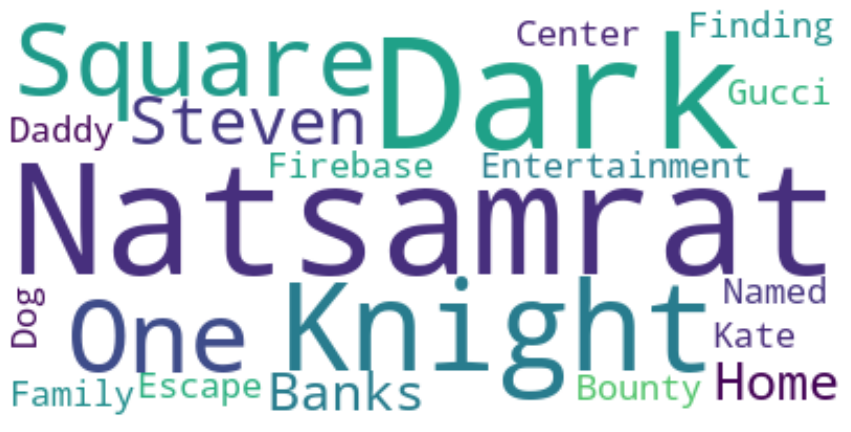

In [113]:
#Word cloud on movie titles

text = ",".join(review for review in top_movies.Title)
wordcloud = WordCloud(max_words=200,collocations=False,background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()



In [114]:
# Movies Count per Country

movies_by_country = filtered_df.groupby('Country')['Title'].count().reset_index().sort_values('Title',ascending = False).head(10).rename(columns = {'Title':'MovieCount'})
fig = px.pie(movies_by_country,names='Country', values='MovieCount')
fig.update_traces(rotation=180, pull=[0.1,0.03,0.03,0.03,0.03],textinfo="percent+label", title='Movie Count per Country')
fig.update_layout(showlegend=False)
fig.show()



In [115]:
# Movie and Genders per IMDb ratings
def sunburst(dataframe,platform,c):
    dataframe=dataframe.loc[dataframe[platform] == 1]
    dataframe=dataframe.sort_values(by='IMDb', ascending=False)
    rating = dataframe[0:10]
    fig =px.sunburst(
    rating,
    path=['Title','Genres'],
    values='IMDb',
    color='IMDb',
    color_continuous_scale=c)
    fig.show()



In [116]:
sunburst(filtered_df,'Netflix','amp')

In [117]:
sunburst(filtered_df,'Prime Video','Blugrn')

In [118]:
sunburst(filtered_df,'Disney+','haline')

In [119]:
sunburst(filtered_df,'Hulu','dense')

In [120]:
# Languages in movies by Netflix platform
columna = "Netflix"


resultado_netflix = (
    filtered_df
    .query(f"{columna}==1")
    ["Language"]
    .str.split(",", expand=True)
    .melt(var_name="columns", value_name="lan")
    ["lan"]
    .value_counts() / len(filtered_df.query(f"{columna}==1")) * 100
)

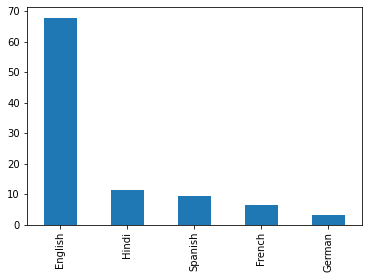

In [121]:
#Plot
resultado_netflix.iloc[0:5].plot(kind="bar")

In [122]:
# Languages in movies by Prime Video platform
columna = "`Prime Video`"


resultado_prime = (
    filtered_df
    .query(f"{columna}==1")
    ["Language"]
    .str.split(",", expand=True)
    .melt(var_name="columns", value_name="lan")
    ["lan"]
    .value_counts() / len(filtered_df.query(f"{columna}==1")) * 100
)

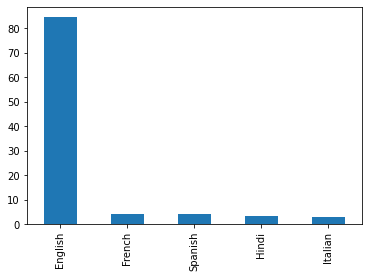

In [123]:
#Plot
resultado_prime.iloc[0:5].plot(kind="bar")

In [124]:
# Languages in movies by Hulu platform

columna = "Hulu"


resultado_hulu = (
    filtered_df
    .query(f"{columna}==1")
    ["Language"]
    .str.split(",", expand=True)
    .melt(var_name="columns", value_name="lan")
    ["lan"]
    .value_counts() / len(filtered_df.query(f"{columna}==1")) * 100
)

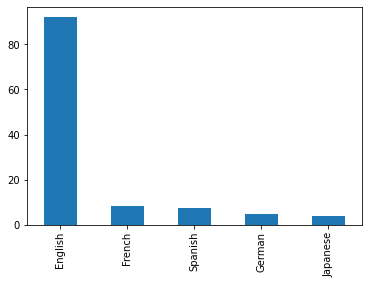

In [125]:
#plot
resultado_hulu.iloc[0:5].plot(kind="bar")

In [126]:
# Languages in movies by Disney+ platform
columna = "`Disney+`"


resultado_disney = (
    filtered_df
    .query(f"{columna}==1")
    ["Language"]
    .str.split(",", expand=True)
    .melt(var_name="columns", value_name="lan")
    ["lan"]
    .value_counts() / len(filtered_df.query(f"{columna}==1")) * 100
)

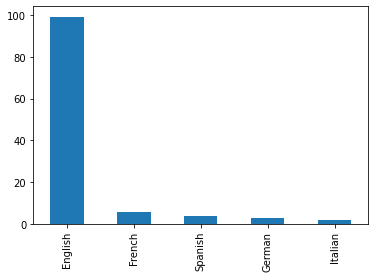

In [127]:
#Plot
resultado_disney.iloc[0:5].plot(kind="bar")

In [128]:
#Concatenate languages by platform
Idiomas_Final = (
    resultado_netflix
    .append(resultado_prime)
    .append(resultado_hulu)
    .append(resultado_disney)
)

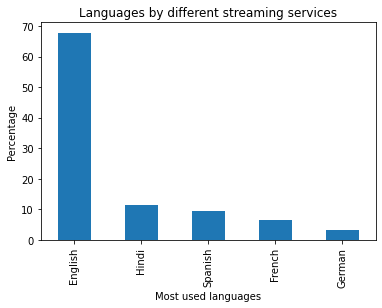

In [129]:
#Plot
Idiomas_Final.iloc[0:5].plot(kind="bar")
plt.xlabel("Most used languages")
plt.ylabel("Percentage")
plt.title("Languages by different streaming services")
plt.show()

In [134]:
#Save df in csv
filtered_df.to_csv('moviesdf.csv', index= False)
master_df2.to_csv('seriesdf.csv', index= False)